In [60]:
import pandas as pd
import numpy as np
import os
from pandas import  isnull
import matplotlib.pyplot as plt
%matplotlib inline 

In [61]:
master = pd.read_csv('E:/Web Analytics/pandas-advanced/materials/data/Master.csv')
master.head()

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
0,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,4.0,Finland,NaN,Lappeenranta,NaN,NaN,NaN,NaN,NaN,NaN
1,abbeybr01,NaN,NaN,Bruce,Abbey,NaN,Bruce,NaN,73.0,185.0,...,18.0,Canada,ON,Toronto,NaN,NaN,NaN,NaN,NaN,NaN
2,abbotge01,NaN,NaN,George,Abbott,NaN,George Henry,Preacher,67.0,153.0,...,3.0,Canada,ON,Synenham,NaN,NaN,NaN,NaN,NaN,NaN
3,abbotre01,NaN,NaN,Reg,Abbott,NaN,Reginald Stewart,NaN,71.0,164.0,...,4.0,Canada,MB,Winnipeg,NaN,NaN,NaN,NaN,NaN,NaN
4,abdelju01,NaN,NaN,Justin,Abdelkader,NaN,NaN,NaN,73.0,195.0,...,25.0,USA,MI,Muskegon,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
master.shape

(7761, 31)

In [63]:
master.columns

Index(['playerID', 'coachID', 'hofID', 'firstName', 'lastName', 'nameNote',
       'nameGiven', 'nameNick', 'height', 'weight', 'shootCatch', 'legendsID',
       'ihdbID', 'hrefID', 'firstNHL', 'lastNHL', 'firstWHA', 'lastWHA', 'pos',
       'birthYear', 'birthMon', 'birthDay', 'birthCountry', 'birthState',
       'birthCity', 'deathYear', 'deathMon', 'deathDay', 'deathCountry',
       'deathState', 'deathCity'],
      dtype='object')

In [64]:
(master["playerID"]
.pipe(isnull)
.value_counts())

False    7520
True      241
Name: playerID, dtype: int64

In [65]:
master.isnull().any()

playerID         True
coachID          True
hofID            True
firstName        True
lastName        False
nameNote         True
nameGiven        True
nameNick         True
height           True
weight           True
shootCatch       True
legendsID        True
ihdbID           True
hrefID           True
firstNHL         True
lastNHL          True
firstWHA         True
lastWHA          True
pos              True
birthYear        True
birthMon         True
birthDay         True
birthCountry     True
birthState       True
birthCity        True
deathYear        True
deathMon         True
deathDay         True
deathCountry     True
deathState       True
deathCity        True
dtype: bool

In [66]:
master_orig = master.copy()
master = master.dropna(subset=["playerID"])
master.shape

(7520, 31)

In [67]:
master = master.dropna(subset=["firstNHL", "lastNHL"], how="all")

In [68]:
master = master.loc[master["lastNHL"] >= 1980]
master.shape

(4627, 31)

In [69]:
master.columns

Index(['playerID', 'coachID', 'hofID', 'firstName', 'lastName', 'nameNote',
       'nameGiven', 'nameNick', 'height', 'weight', 'shootCatch', 'legendsID',
       'ihdbID', 'hrefID', 'firstNHL', 'lastNHL', 'firstWHA', 'lastWHA', 'pos',
       'birthYear', 'birthMon', 'birthDay', 'birthCountry', 'birthState',
       'birthCity', 'deathYear', 'deathMon', 'deathDay', 'deathCountry',
       'deathState', 'deathCity'],
      dtype='object')

In [70]:
columns_to_keep = ["playerID","firstName","lastName","pos","birthYear","birthMon","birthDay","birthCountry","birthState","birthCity"]
master[columns_to_keep].head()
master.filter(columns_to_keep).head()

,playerID,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
0,aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
4,abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon
9,abidra01,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal
11,abrahth01,Thommy,Abrahamsson,D,1947.0,4.0,12.0,Sweden,NaN,Leksand
14,actonke01,Keith,Acton,C,1958.0,4.0,15.0,Canada,ON,Stouffville


In [71]:
master.shape

(4627, 31)

In [72]:
master = master.filter(regex="(playerID|pos|^birth)|(Name$)")
master.columns

Index(['playerID', 'firstName', 'lastName', 'pos', 'birthYear', 'birthMon',
       'birthDay', 'birthCountry', 'birthState', 'birthCity'],
      dtype='object')

In [73]:
def mem_mib(df):
    print("{0:2f} MiB".format(
    df.memory_usage().sum()/ (1024 * 1024)
    ))
mem_mib(master)
mem_mib(master_orig)

0.388313 MiB
1.835640 MiB


In [74]:
master['pos'].value_counts()

D      1418
C      1037
L       848
R       832
G       463
F        28
L/C       1
Name: pos, dtype: int64

In [75]:
pd.Categorical(master['pos'])

[C, L, L, D, C, ..., R, L, L, C, D]
Length: 4627
Categories (7, object): [C, D, F, G, L, L/C, R]

In [76]:
def make_categorical(df, col_name):
    df.loc[:, col_name] = pd.Categorical(df[col_name])

In [77]:
make_categorical(master, 'pos')
make_categorical(master, "birthCountry")
make_categorical(master, "birthState")
mem_mib(master)

0.299142 MiB


In [78]:
master.head()

,playerID,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
0,aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
4,abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon
9,abidra01,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal
11,abrahth01,Thommy,Abrahamsson,D,1947.0,4.0,12.0,Sweden,NaN,Leksand
14,actonke01,Keith,Acton,C,1958.0,4.0,15.0,Canada,ON,Stouffville


In [79]:
master = master.set_index("playerID")
master.head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
playerID,,,,,,,,,
aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon
abidra01,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal
abrahth01,Thommy,Abrahamsson,D,1947.0,4.0,12.0,Sweden,NaN,Leksand
actonke01,Keith,Acton,C,1958.0,4.0,15.0,Canada,ON,Stouffville


In [80]:
master.to_pickle(os.path.join("..", "master.pickle"))

## Scoring data 

In [81]:
scoring = pd.read_csv('E:/Web Analytics/pandas-advanced/materials/data/Scoring.csv')
mem_mib(scoring)
scoring.shape
scoring.head()

10.871788 MiB


,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
0,aaltoan01,1997,1,ANA,NHL,C,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaltoan01,1998,1,ANA,NHL,C,73.0,3.0,5.0,8.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aaltoan01,1999,1,ANA,NHL,C,63.0,7.0,11.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aaltoan01,2000,1,ANA,NHL,C,12.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abbeybr01,1975,1,CIN,WHA,D,17.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
scoring.shape

(45967, 31)

In [83]:
def recent_nh1_only(df):
    return df[(df["lgID"] == "NHL") & (df["year"] >= 1980)]

scoring = recent_nh1_only(scoring)
scoring.shape

(28616, 31)

In [84]:
scoring.columns

Index(['playerID', 'year', 'stint', 'tmID', 'lgID', 'pos', 'GP', 'G', 'A',
       'Pts', 'PIM', '+/-', 'PPG', 'PPA', 'SHG', 'SHA', 'GWG', 'GTG', 'SOG',
       'PostGP', 'PostG', 'PostA', 'PostPts', 'PostPIM', 'Post+/-', 'PostPPG',
       'PostPPA', 'PostSHG', 'PostSHA', 'PostGWG', 'PostSOG'],
      dtype='object')

In [85]:
scoring = scoring.filter(regex="^(?!(Post|PP|SH)).*")
scoring.columns

Index(['playerID', 'year', 'stint', 'tmID', 'lgID', 'pos', 'GP', 'G', 'A',
       'Pts', 'PIM', '+/-', 'GWG', 'GTG', 'SOG'],
      dtype='object')

In [86]:
scoring = scoring.iloc[:, [0,1,3,6,7,8,9,14]]
scoring.columns

Index(['playerID', 'year', 'tmID', 'GP', 'G', 'A', 'Pts', 'SOG'], dtype='object')

In [87]:
make_categorical(scoring, "tmID")
scoring.head()

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
7,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [88]:
scoring.reset_index().head()

,index,playerID,year,tmID,GP,G,A,Pts,SOG
0,0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,2,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,3,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,7,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [89]:
scoring = scoring.reset_index(drop=True)

scoring.head()

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [90]:
scoring.to_pickle(os.path.join("..", "scoring.pickle"))

## Teams data

In [91]:
teams = pd.read_csv('E:/Web Analytics/pandas-advanced/materials/data/Teams.csv')
mem_mib(teams)
teams.shape

0.312981 MiB


(1519, 27)

In [92]:
teams.columns

Index(['year', 'lgID', 'tmID', 'franchID', 'confID', 'divID', 'rank',
       'playoff', 'G', 'W', 'L', 'T', 'OTL', 'Pts', 'SoW', 'SoL', 'GF', 'GA',
       'name', 'PIM', 'BenchMinor', 'PPG', 'PPC', 'SHA', 'PKG', 'PKC', 'SHF'],
      dtype='object')

In [93]:
teams = recent_nh1_only(teams)
teams = teams[['year',"tmID","name"]]
teams.head()

,year,tmID,name
727,1980,BOS,Boston Bruins
728,1980,BUF,Buffalo Sabres
729,1980,CAL,Calgary Flames
730,1980,CHI,Chicago Black Hawks
731,1980,COR,Colorado Rockies


In [94]:
teams.nunique()

year    31
tmID    37
name    37
dtype: int64

In [95]:
make_categorical(teams, "tmID")

In [96]:
teams.to_pickle(os.path.join("..", "teams.pickle"))

## Team Splits


In [97]:
team_splits = pd.read_csv('E:/Web Analytics/pandas-advanced/materials/data/TeamSplits.csv')
team_splits.shape

(1519, 43)

In [98]:
team_splits.columns

Index(['year', 'lgID', 'tmID', 'hW', 'hL', 'hT', 'hOTL', 'rW', 'rL', 'rT',
       'rOTL', 'SepW', 'SepL', 'SepT', 'SepOL', 'OctW', 'OctL', 'OctT',
       'OctOL', 'NovW', 'NovL', 'NovT', 'NovOL', 'DecW', 'DecL', 'DecT',
       'DecOL', 'JanW', 'JanL', 'JanT', 'JanOL', 'FebW', 'FebL', 'FebT',
       'FebOL', 'MarW', 'MarL', 'MarT', 'MarOL', 'AprW', 'AprL', 'AprT',
       'AprOL'],
      dtype='object')

In [99]:
team_splits = recent_nh1_only(team_splits)

In [100]:
cols_to_drop = team_splits.columns[3:11]


In [101]:
team_splits = team_splits.drop(cols_to_drop, axis=1)
team_splits.columns

Index(['year', 'lgID', 'tmID', 'SepW', 'SepL', 'SepT', 'SepOL', 'OctW', 'OctL',
       'OctT', 'OctOL', 'NovW', 'NovL', 'NovT', 'NovOL', 'DecW', 'DecL',
       'DecT', 'DecOL', 'JanW', 'JanL', 'JanT', 'JanOL', 'FebW', 'FebL',
       'FebT', 'FebOL', 'MarW', 'MarL', 'MarT', 'MarOL', 'AprW', 'AprL',
       'AprT', 'AprOL'],
      dtype='object')

In [102]:
team_splits = team_splits.drop("lgID",axis=1)

In [103]:
team_splits.columns

Index(['year', 'tmID', 'SepW', 'SepL', 'SepT', 'SepOL', 'OctW', 'OctL', 'OctT',
       'OctOL', 'NovW', 'NovL', 'NovT', 'NovOL', 'DecW', 'DecL', 'DecT',
       'DecOL', 'JanW', 'JanL', 'JanT', 'JanOL', 'FebW', 'FebL', 'FebT',
       'FebOL', 'MarW', 'MarL', 'MarT', 'MarOL', 'AprW', 'AprL', 'AprT',
       'AprOL'],
      dtype='object')

In [104]:
make_categorical(team_splits, "tmID")
team_splits.to_pickle(os.path.join("..", "team_splits.pickle"))

In [105]:
master = pd.read_pickle(os.path.join("..","master.pickle"))
scoring = pd.read_pickle(os.path.join("..","scoring.pickle"))
teams = pd.read_pickle(os.path.join("..","teams.pickle"))
team_splits = pd.read_pickle(os.path.join("..","team_splits.pickle"))

In [106]:
master.head(2)

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
playerID,,,,,,,,,
aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon


In [107]:
scoring.head(2)

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0


In [108]:
pd.merge(master, scoring, left_index=True, right_on="playerID").head()


,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [109]:
scoring.index

RangeIndex(start=0, stop=28616, step=1)

In [110]:
merged = pd.merge(master, scoring, left_index=True, right_on="playerID")
merged.head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [111]:
merged = merged.filter(regex="^(?!(birth)).*")
merged.head()

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [112]:
merged.to_pickle(os.path.join("..", "scoring.pickle"))

In [113]:
teams.sample(2)

,year,tmID,name
1453,2009,SJS,San Jose Sharks
1006,1993,BUF,Buffalo Sabres


In [114]:
team_splits.sample(2)

,year,tmID,SepW,SepL,SepT,SepOL,OctW,OctL,OctT,OctOL,...,FebT,FebOL,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL
1004,1993,ANA,NaN,NaN,NaN,NaN,2.0,8.0,2.0,NaN,...,1.0,NaN,6.0,8.0,0.0,NaN,3.0,3.0,0.0,NaN
1381,2007,FLO,NaN,NaN,NaN,NaN,5.0,7.0,NaN,0.0,...,NaN,3.0,8.0,3.0,NaN,1.0,2.0,1.0,NaN,0.0


In [115]:
teams2 = teams[["tmID","name"]]
teams2 = teams2.drop_duplicates()
teams2['tmID'].value_counts().head()

CHI    2
MIN    1
HAR    1
FLO    1
EDM    1
Name: tmID, dtype: int64

In [116]:
pd.merge(team_splits, teams, left_on=["tmID","year"],
        right_on=["tmID","year"]).head(4)

,year,tmID,SepW,SepL,SepT,SepOL,OctW,OctL,OctT,OctOL,...,FebOL,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL,name
0,1980,BOS,NaN,NaN,NaN,NaN,2.0,7.0,1.0,NaN,...,NaN,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN,Boston Bruins
1,1980,BUF,NaN,NaN,NaN,NaN,5.0,2.0,2.0,NaN,...,NaN,8.0,6.0,1.0,NaN,1.0,1.0,1.0,NaN,Buffalo Sabres
2,1980,CAL,NaN,NaN,NaN,NaN,5.0,4.0,2.0,NaN,...,NaN,6.0,6.0,2.0,NaN,2.0,0.0,0.0,NaN,Calgary Flames
3,1980,CHI,NaN,NaN,NaN,NaN,6.0,4.0,2.0,NaN,...,NaN,4.0,5.0,4.0,NaN,1.0,1.0,1.0,NaN,Chicago Black Hawks


In [117]:
merged = pd.merge(team_splits, teams, on=["tmID", "year"])
merged.head()

,year,tmID,SepW,SepL,SepT,SepOL,OctW,OctL,OctT,OctOL,...,FebOL,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL,name
0,1980,BOS,NaN,NaN,NaN,NaN,2.0,7.0,1.0,NaN,...,NaN,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN,Boston Bruins
1,1980,BUF,NaN,NaN,NaN,NaN,5.0,2.0,2.0,NaN,...,NaN,8.0,6.0,1.0,NaN,1.0,1.0,1.0,NaN,Buffalo Sabres
2,1980,CAL,NaN,NaN,NaN,NaN,5.0,4.0,2.0,NaN,...,NaN,6.0,6.0,2.0,NaN,2.0,0.0,0.0,NaN,Calgary Flames
3,1980,CHI,NaN,NaN,NaN,NaN,6.0,4.0,2.0,NaN,...,NaN,4.0,5.0,4.0,NaN,1.0,1.0,1.0,NaN,Chicago Black Hawks
4,1980,COR,NaN,NaN,NaN,NaN,4.0,4.0,2.0,NaN,...,NaN,4.0,9.0,1.0,NaN,0.0,1.0,2.0,NaN,Colorado Rockies


In [118]:
merged.to_pickle(os.path.join("..","team_splits.pickle"))

In [119]:
scoring.head()

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [120]:
scoring = pd.read_pickle(os.path.join("..","scoring.pickle"))
team_splits = pd.read_pickle(os.path.join("..","team_splits.pickle"))

In [121]:
scoring.head()

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [122]:
three_years = scoring.loc[(scoring.year > 2000) & (scoring.year < 2004)]

# One record per player/year
three_years = three_years.drop_duplicates(subset=["playerID", "year"])

# Get three random players with complete history b/w 2001-2003
counts = three_years['playerID'].value_counts()
ids = counts[counts == 3].sample(3).index

# Get actual records corresponding for those players
df3 = three_years.loc[three_years['playerID'].isin(ids)]
basic_df3 = df3[['playerID', "year", "G"]]

In [123]:
basic_df3.head()

,playerID,year,G
6562,eatonma01,2001,3.0
6563,eatonma01,2002,2.0
6564,eatonma01,2003,4.0
16529,mceacsh01,2001,15.0
16530,mceacsh01,2002,10.0


In [124]:
pivot = basic_df3.pivot(index="playerID", columns="year", values="G")
pivot

year,2001,2002,2003
playerID,,,
eatonma01,3.0,2.0,4.0
mceacsh01,15.0,10.0,17.0
walsede01,1.0,4.0,1.0


In [125]:
pivot.index.name = "playerID"
pivot.columns.name = "year"

In [126]:
pivot

year,2001,2002,2003
playerID,,,
eatonma01,3.0,2.0,4.0
mceacsh01,15.0,10.0,17.0
walsede01,1.0,4.0,1.0


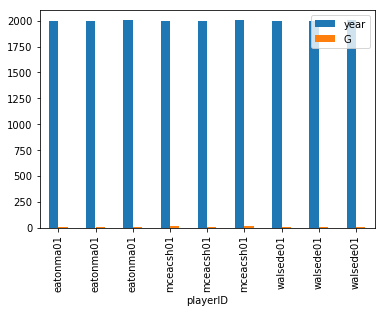

In [127]:
basic_df3.set_index("playerID").plot.bar();

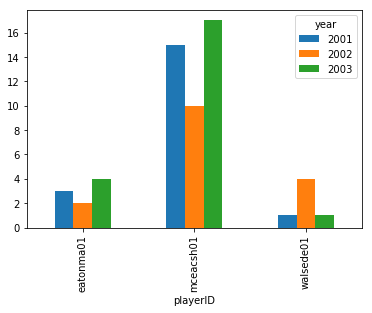

In [128]:
pivot.plot.bar();

In [129]:
pivot = pivot.reset_index()
pivot.columns.name = None
pivot

,playerID,2001,2002,2003
0,eatonma01,3.0,2.0,4.0
1,mceacsh01,15.0,10.0,17.0
2,walsede01,1.0,4.0,1.0


In [133]:
pivot.melt(id_vars="playerID",value_vars=[2001, 2002],var_name="year",value_name="goals")

,playerID,year,goals
0,eatonma01,2001,3.0
1,mceacsh01,2001,15.0
2,walsede01,2001,1.0
3,eatonma01,2002,2.0
4,mceacsh01,2002,10.0
5,walsede01,2002,4.0


In [153]:
master = pd.read_pickle(os.path.join("..","master.pickle"))

In [154]:
master.head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
playerID,,,,,,,,,
aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon
abidra01,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal
abrahth01,Thommy,Abrahamsson,D,1947.0,4.0,12.0,Sweden,NaN,Leksand
actonke01,Keith,Acton,C,1958.0,4.0,15.0,Canada,ON,Stouffville


In [155]:
master = master.assign(birthDate = pd.to_datetime({
    'year': master.birthYear,
    'month': master.birthMon,
    'day': master.birthDay
}))

master = master.drop(['birthYear','birthMon','birthDay'],axis=1)
master.head()

,firstName,lastName,pos,birthCountry,birthState,birthCity,birthDate
playerID,,,,,,,
aaltoan01,Antti,Aalto,C,Finland,NaN,Lappeenranta,1975-03-04
abdelju01,Justin,Abdelkader,L,USA,MI,Muskegon,1987-02-25
abidra01,Ramzi,Abid,L,Canada,QC,Montreal,1980-03-24
abrahth01,Thommy,Abrahamsson,D,Sweden,NaN,Leksand,1947-04-12
actonke01,Keith,Acton,C,Canada,ON,Stouffville,1958-04-15


In [147]:
scoring.head()

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [148]:
mi = scoring.set_index(['playerID', 'year'])
mi.head()

firstName    lastName pos tmID    GP    G     A   Pts    SOG
playerID  year                                                             
aaltoan01 1997     Antti       Aalto   C  ANA   3.0  0.0   0.0   0.0    1.0
          1998     Antti       Aalto   C  ANA  73.0  3.0   5.0   8.0   61.0
          1999     Antti       Aalto   C  ANA  63.0  7.0  11.0  18.0  102.0
          2000     Antti       Aalto   C  ANA  12.0  1.0   1.0   2.0   18.0
abdelju01 2007    Justin  Abdelkader   L  DET   2.0  0.0   0.0   0.0    6.0

In [149]:
idx = pd.IndexSlice
mi2 = mi.sort_index()

In [150]:
mi.index.is_lexsorted()

True

In [156]:
ts = master.birthDate[0]

In [158]:
print(u"{},{} {} {} ".format( ts.day, ts.month_name(), ts.year))

AttributeError: 'Timestamp' object has no attribute 'month_name'